In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# Load Data from CSV file
file_path = 'healing_log_ml_ready.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

In [3]:
X = df[['CPU Usage (%)', 'RAM Usage (%)', 'Disk Usage (%)']]


In [4]:
df.head()

,Timestamp,Server Name,Action Taken,CPU Usage (%),RAM Usage (%),Disk Usage (%),Anomaly
0,2025-04-27 13:05:42,Server1,Restarted due to High CPU Usage,85,46,38,1
1,2025-04-27 13:05:44,Server2,Restarted due to High CPU Usage,73,44,61,1
2,2025-04-27 13:05:46,Server3,Restarted due to High CPU Usage,98,47,43,1
3,2025-04-27 13:05:53,Server1,Restarted due to High CPU Usage,43,64,35,1
4,2025-04-27 13:13:26,Server3,Restarted due to High CPU Usage,29,71,56,1


In [5]:
# Train the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)  # contamination=0.1 (10% anomalies)
model.fit(X)

IsolationForest(contamination=0.1, random_state=42)

In [6]:
# Predict anomalies
predictions = model.predict(X)
predictions = [1 if x == 1 else -1 for x in predictions]  # Convert 1 to normal and -1 to anomaly

In [7]:
# Evaluate the model
print("Classification Report:")
print(classification_report(df['Anomaly'], predictions))

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.90      0.95      1231

    accuracy                           0.90      1231
   macro avg       0.50      0.45      0.47      1231
weighted avg       1.00      0.90      0.95      1231



c:\Users\lucif\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucif\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucif\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

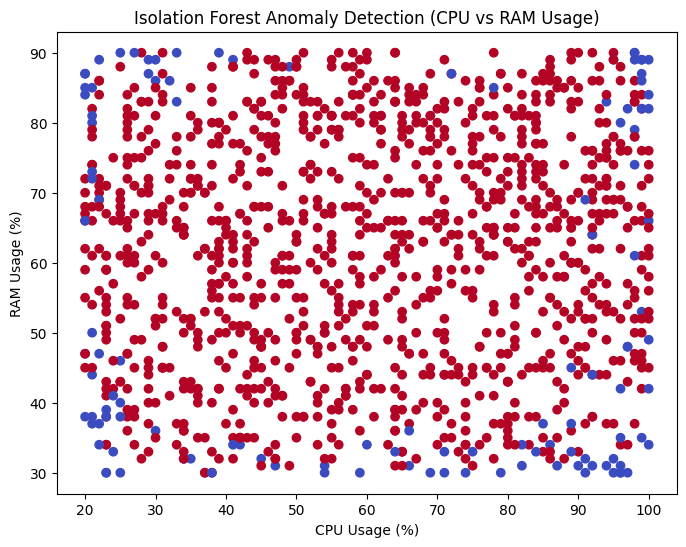

In [8]:
# Visualize the anomalies
plt.figure(figsize=(8, 6))
plt.scatter(df['CPU Usage (%)'], df['RAM Usage (%)'], c=predictions, cmap='coolwarm', marker='o')
plt.title('Isolation Forest Anomaly Detection (CPU vs RAM Usage)')
plt.xlabel('CPU Usage (%)')
plt.ylabel('RAM Usage (%)')
plt.show()

In [9]:
import joblib

In [10]:
joblib.dump(model, 'trained_model.pkl')

print("Model saved as 'trained_model.pkl'.")

Model saved as 'trained_model.pkl'.
